In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use("ggplot")

In [3]:
def random_walk(size, starting_price, drift_rate, variance):
    returns = np.random.normal(loc=drift_rate, scale=variance, size=size) + 1
    returns[0] = 1
    p = starting_price * np.cumprod(returns)
    return p

In [4]:
bull = random_walk(1000, 100, 0.001, 0.01)
bear = random_walk(1000, bull[-1], -0.002, 0.02)

In [5]:
ts = np.concatenate((bull, bear))

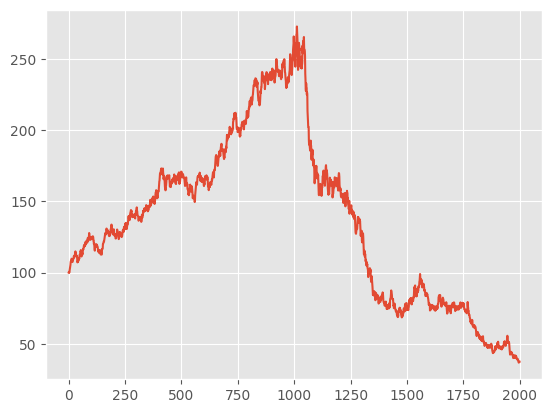

In [6]:
plt.plot(ts)

In [7]:
from gtda.time_series import TakensEmbedding, SlidingWindow

In [8]:
TE = TakensEmbedding(time_delay=1, dimension=4)

ts_embedded = np.squeeze(TE.fit_transform(ts.reshape(1, -1)))

SW = SlidingWindow(size=50, stride=1)

ts_window = SW.fit_transform(ts_embedded)

In [9]:
from gtda.homology import (
    VietorisRipsPersistence, SparseRipsPersistence, WeakAlphaPersistence,
    EuclideanCechPersistence,
)

In [37]:
VR = WeakAlphaPersistence(homology_dimensions=[0, 1])
diagrams = VR.fit_transform(ts_window)

In [12]:
from gtda.diagrams import (
    NumberOfPoints, Amplitude, ComplexPolynomial,
    PersistenceEntropy
)

In [13]:
amplitude = Amplitude(metric="landscape", metric_params={"p":1})

amplitudes = amplitude.fit_transform(diagrams)


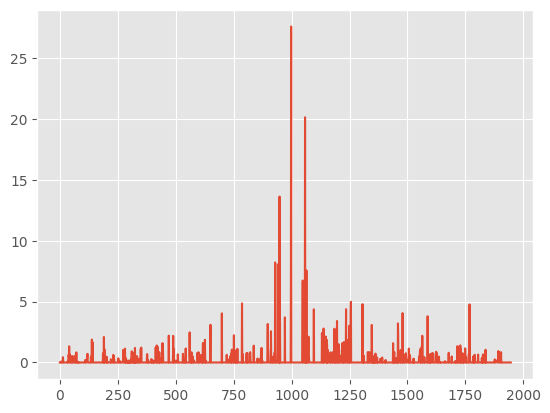

In [14]:
plt.plot(np.abs(amplitudes[1:] - amplitudes[:-1]))

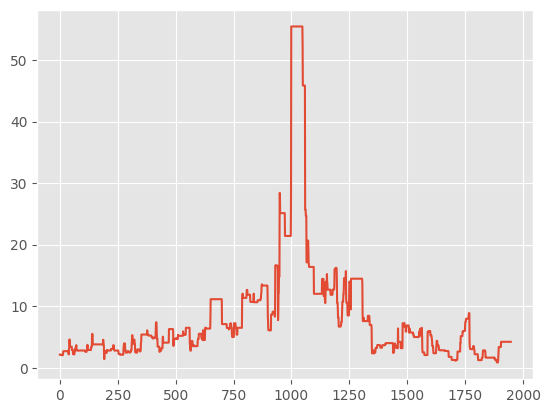

In [15]:
plt.plot(amplitudes)

In [16]:
PE = PersistenceEntropy()

ts_entropy = PE.fit_transform(diagrams)

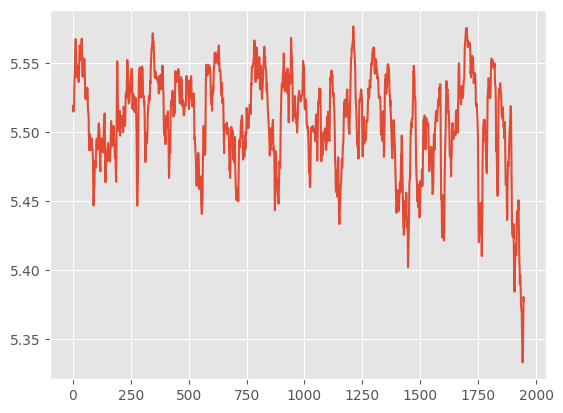

In [17]:
plt.plot(ts_entropy)

In [18]:
t = 1
magnitudes = []
for d in diagrams:
    f = (-1) ** d[:, 2] * (np.exp(-d[:, 0] * t) - np.exp(-d[:, 1] * t))
    magnitudes.append(np.sum(f))

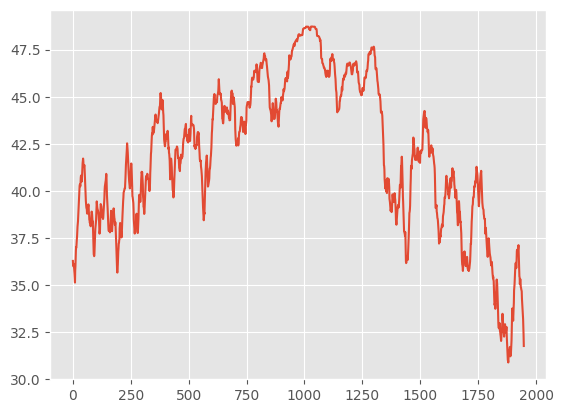

In [19]:
plt.plot(magnitudes)